In [1]:
import random

import matplotlib.pyplot as plt

from src.common.gnfr_sector import GnfrSector
from src.common.paths import PlotPaths
from src.dataset.tno_dataset_collection import TnoDatasetCollection
from src.plotting.city_emission_field_plot import plot_emission_field, plot_emission_field_tensor

In [2]:
dataset_collection = TnoDatasetCollection()

[INFO] > Loading TNO data from '/home/must1d/Repositories/inventory-embeddings/data/TNO-GHGco-1km/TNO_by_city/TNO_GHGco_2015_highres_by_city.csv'
[INFO] > Loading TNO data from '/home/must1d/Repositories/inventory-embeddings/data/TNO-GHGco-1km/TNO_by_city/TNO_GHGco_2018_highres_by_city.csv'
[INFO] > Test Set has 13 unique cites!                           
	Szczecin, Duisburg, Magdeburg, Reims, Győr, Siegen, Hamburg, Prague, Aachen, Innsbruck, Dresden, Großzschocher, Gdynia
[INFO] > Validation Set has 15 unique cites!
	Bydgoszcz, Frankfurt am Main, Southampton, Ingolstadt, Koblenz, Nijmegen, Kassel, Angers, Erfurt, Bielefeld, Linz, Kalisz, Brussels, Zielona Góra, Wałbrzych
[INFO] > Training Set has 74 unique cites!
	Nancy, Mannheim, Kiel, Legnica, Eindhoven, Norwich, Trier, Würzburg, Ipswich, Koszalin, Braunschweig, Karlsruhe, Poznań, Heilbronn, Besançon, Vienna, Reading, Chemnitz, Basel, London, Bremen, Nürnberg, Southend-on-Sea, Dijon, Berlin, Orléans, Sunderland, Odense, Apeldoorn, L

In [3]:
emission_field_plot_path = PlotPaths.PLOTS / "emission_fields"
emission_field_plot_path.mkdir(exist_ok=True)

# Case Study

In [4]:
CITY = "Munich"
YEAR = 2015

FONTSIZE_LABELS = 15
FONTSIZE_TICKS = 11

In [5]:
case_study_data = dataset_collection.get_case_study_data(CITY, year=YEAR)
emission_field = case_study_data.get_city_emission_field(0, apply_sampling_transforms=False)

In [6]:
plot_path = emission_field_plot_path / CITY.lower()
plot_path.mkdir(exist_ok=True)

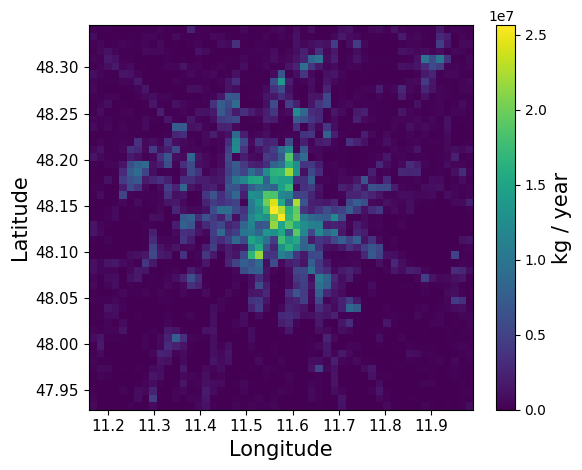

In [7]:
_, ax = plt.subplots()

plot_emission_field(emission_field=emission_field, ax=ax, fontsize=FONTSIZE_LABELS)
plt.xticks(fontsize=FONTSIZE_TICKS)
plt.yticks(fontsize=FONTSIZE_TICKS)

plt.tight_layout()
plt.savefig(plot_path / f"{CITY.lower()}_{YEAR}_total_emissions.eps", format="eps", bbox_inches="tight")

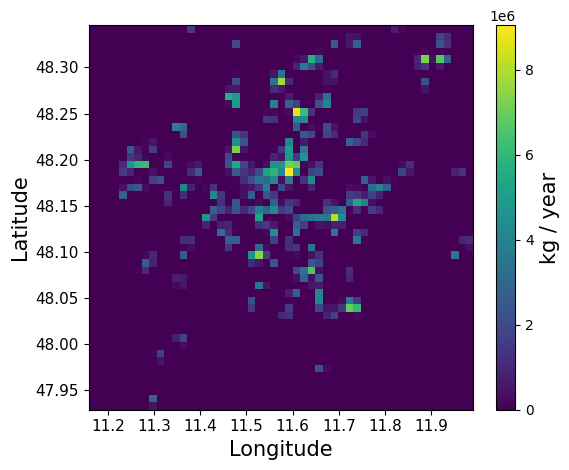

In [8]:
_, ax = plt.subplots()

plot_emission_field(emission_field=emission_field, ax=ax, sector=GnfrSector.B, fontsize=FONTSIZE_LABELS)
plt.xticks(fontsize=FONTSIZE_TICKS)
plt.yticks(fontsize=FONTSIZE_TICKS)

plt.tight_layout()
plt.savefig(plot_path / f"{CITY.lower()}_{YEAR}_sector_b.eps", format="eps", bbox_inches="tight")

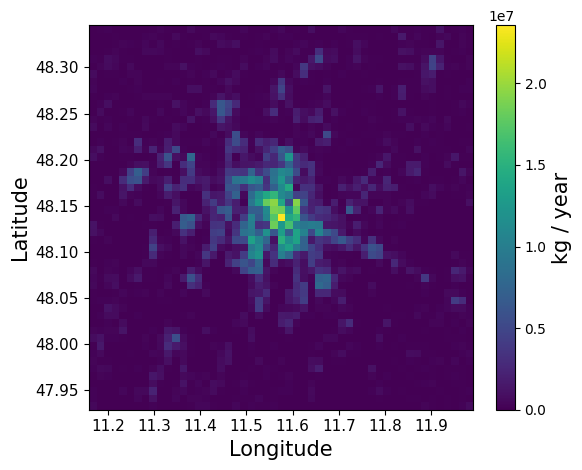

In [9]:
_, ax = plt.subplots()

plot_emission_field(emission_field=emission_field, ax=ax, sector=GnfrSector.C, fontsize=FONTSIZE_LABELS)
plt.xticks(fontsize=FONTSIZE_TICKS)
plt.yticks(fontsize=FONTSIZE_TICKS)

plt.tight_layout()
plt.savefig(plot_path / f"{CITY.lower()}_{YEAR}_sector_c.eps", format="eps", bbox_inches="tight")

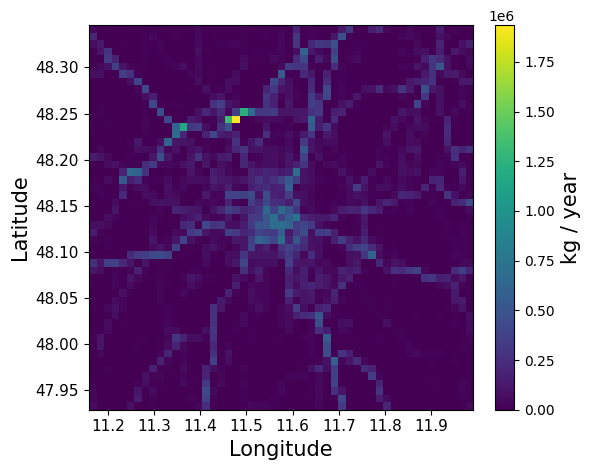

In [10]:
_, ax = plt.subplots()

plot_emission_field(emission_field=emission_field, ax=ax, sector=GnfrSector.F1, fontsize=FONTSIZE_LABELS)
plt.xticks(fontsize=FONTSIZE_TICKS)
plt.yticks(fontsize=FONTSIZE_TICKS)

plt.tight_layout()
plt.savefig(plot_path / f"{CITY.lower()}_{YEAR}_sector_f1.eps", format="eps", bbox_inches="tight")

# Training Sample

In [11]:
TRAINING_CITY_NAME = "Nürnberg"

In [12]:
data = dataset_collection.training_data

index = -1
for i, city in enumerate(data.city_emission_fields):
    if city.city_name == TRAINING_CITY_NAME:
        index = i
        break

emission_field = data.get_city_emission_field(index)
transformed_emission_field = data.get_city_emission_field(
    index,
    apply_sampling_transforms=True
)

In [13]:
plot_path = emission_field_plot_path / TRAINING_CITY_NAME.lower()
plot_path.mkdir(exist_ok=True)

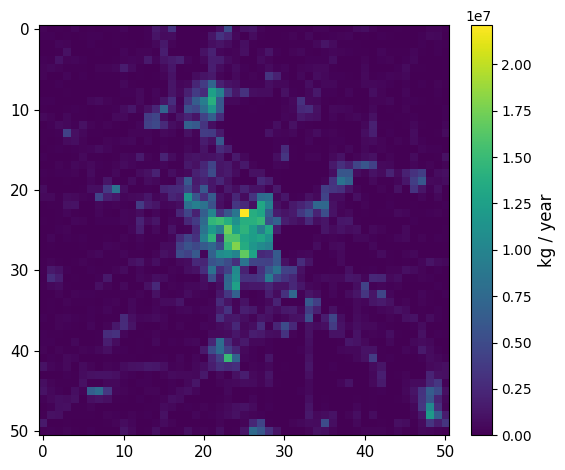

In [14]:
_, ax = plt.subplots()

plot_emission_field_tensor(emission_field=emission_field.co2_ff_area_sources_tensor, ax=ax)
plt.xticks(fontsize=FONTSIZE_TICKS)
plt.yticks(fontsize=FONTSIZE_TICKS)

plt.tight_layout()
plt.savefig(plot_path / f"{TRAINING_CITY_NAME.lower()}.eps", format="eps", bbox_inches="tight")

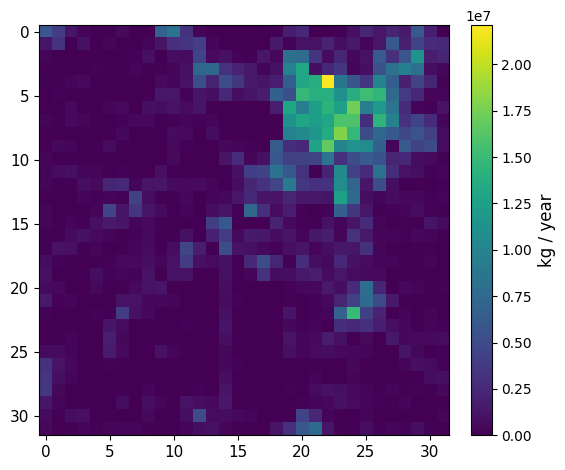

In [15]:
_, ax = plt.subplots()

plot_emission_field_tensor(emission_field=transformed_emission_field.co2_ff_area_sources_tensor, ax=ax)
plt.xticks(fontsize=FONTSIZE_TICKS)
plt.yticks(fontsize=FONTSIZE_TICKS)

plt.tight_layout()
plt.savefig(plot_path / f"{TRAINING_CITY_NAME.lower()}_transformed.eps", format="eps", bbox_inches="tight")